In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
def merge_skyline(left, right):
	result = []
	h1 = h2 = 0
	i = j = 0

	while i < len(left) and j < len(right):
		if left[i][0] < right[j][0]:
			x, h1 = left[i]
			i += 1
		elif right[j][0] < left[i][0]:
			x, h2 = right[j]
			j += 1
		else:
			x, h1 = left[i]
			h2 = right[j][1]
			i += 1
			j += 1
		max_height = max(h1, h2)
		if not result or result[-1][1] != max_height:
			result.append((x, max_height))
	
	result.extend(left[i:])
	result.extend(right[j:])
	return result

def skyline(buildings):
	if not buildings:
		return []
	if len(buildings) == 1:
		l, h, r = buildings[0]
		return [(l, h), (r, 0)]

	mid = len(buildings) // 2
	left_sky = skyline(buildings[:mid])
	right_sky = skyline(buildings[mid:])
	return merge_skyline(left_sky, right_sky)

def draw_skyline(points):
	xs, ys = [points[0][0]], [0]

	for i in range(len(points)):
		x, y = points[i]
		xs.append(x)
		ys.append(y)
		if i + 1 < len(points):
			x_next = points[i + 1][0]
			xs.append(x_next)
			ys.append(y)

	plt.figure(figsize=(10, 5))
	plt.plot(xs, ys, drawstyle='steps-post', color='blue', linewidth=2)
	plt.fill_between(xs, ys, step="post", alpha=0.3, color='skyblue')
	plt.title("Skyline Resultante")
	plt.xlabel("Posição X")
	plt.ylabel("Altura")
	plt.grid(True)

	ax = plt.gca()
	ax.xaxis.set_major_locator(MultipleLocator(1))
	ax.yaxis.set_major_locator(MultipleLocator(1))
	plt.xlim(left=0)

	plt.show()

## Examples

Skyline 1: [(2, 10), (3, 15), (7, 12), (8, 13), (14, 10), (16, 8), (20, 0)]


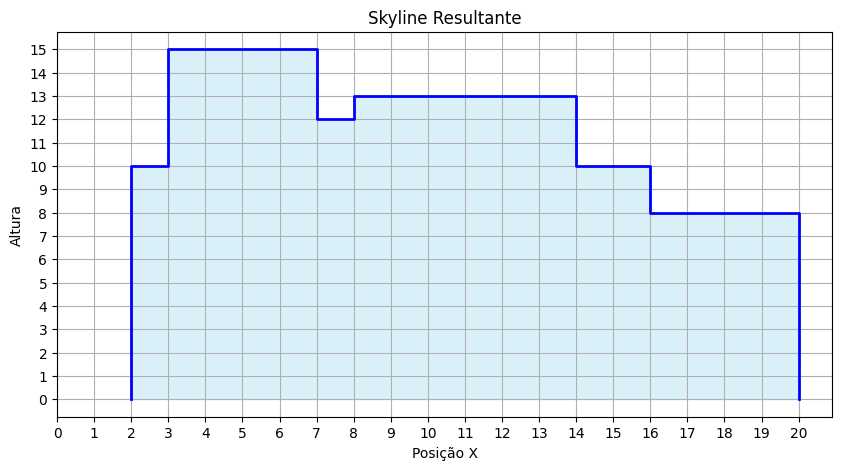

In [3]:
buildings = [(2, 10, 9), (3, 15, 7), (5, 12, 12), (13, 10, 16), (15, 8, 20), (8, 13, 14)]
result = skyline(buildings)
print("Skyline 1:", result)
draw_skyline(result)

Skyline 2: [(2, 5), (3, 7), (8, 11), (11, 7), (15, 0)]


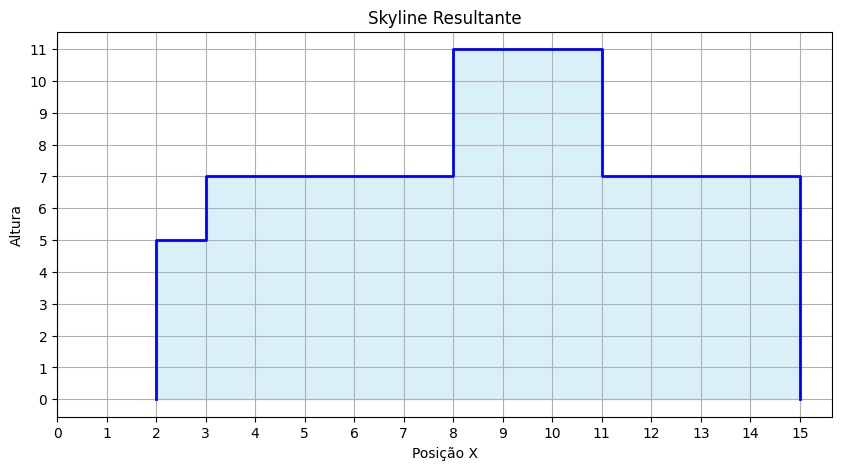

In [4]:
buildings = [(2, 5, 10), (3, 7, 15), (8, 11, 11)]
result = skyline(buildings)
print("Skyline 2:", result)
draw_skyline(result)